<a href="https://colab.research.google.com/github/opovo-mais/jornalismodedados/blob/main/An%C3%A1lises_Shapefiles_Coc%C3%B3_Ayuri_Reis_OP%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 **Análise Geoespacial de Shapefiles da Região do Cocó (Maio/2025)**

Este notebook reúne os códigos utilizados na elaboração do relatório **“Delimitações e Sobreposições de Áreas Protegidas na Região do Cocó (Maio/2025)”**, desenvolvido pela **Central de Dados do Jornal O POVO+**, com análise de **Ayuri Reis (O POVO+)**.

A análise tem como foco o processamento e a visualização de dados geoespaciais (shapefiles) referentes a diferentes delimitações na região do Rio Cocó, em Fortaleza, Ceará, como o Parque Estadual do Cocó, a Área de Proteção Ambiental (APA) do Rio Cocó, Zonas de Dunas (ZD) e o Parque Natural Marinho. O objetivo é calcular áreas, identificar sobreposições e visualizar essas camadas geoespaciais. A presente análise foi realizada com base no notebook e nos arquivos shapefile fornecidos em **Maio de 2025**.

---

## 🧪 Metodologia

> Para esta análise, foram utilizados arquivos shapefile contendo os limites geográficos de diferentes unidades de conservação e zonas de interesse na bacia do Rio Cocó. As principais bibliotecas Python empregadas incluem `geopandas` para manipulação de dados geoespaciais, `pandas` para análise de dados tabulares associados, `matplotlib.pyplot` para visualização estática de mapas, `fiona` para leitura e escrita de arquivos vetoriais, e `shapely.ops` para operações geométricas.
>
> As análises consideraram operações como:
> * Leitura e inspeção de múltiplos arquivos shapefile (ex: `DECRETO_Estadual_UC_Parque_do_Coco.shp`, `APA_do_Rio_Coco.shp`, `ZD_Fortaleza_Decreto_2006.shp`, `Parque_Natural_Marinho_PBSS.shp`).
> * Transformação de sistemas de referência de coordenadas (CRS) para garantir a consistência nas análises espaciais.
> * Cálculo de áreas das geometrias (em km² ou hectares).
> * Dissolução de geometrias para unificar polígonos de uma mesma categoria.
> * Realização de uniões geométricas (`unary_union`) para criar geometrias compostas.
> * Identificação e cálculo de áreas de interseção entre diferentes camadas geoespaciais (ex: sobreposição entre o Parque do Cocó e a APA do Rio Cocó).
> * Visualização das camadas geoespaciais e suas sobreposições através de plots.
>
> Para garantir a transparência e a reprodutibilidade desta e de outras reportagens guiadas por dados, O POVO+ mantém uma página no Github na qual periodicamente são publicados códigos, metodologias, visualizações e bases de dados desenvolvidas.

---

## 📑 Fonte dos Dados

-   **Arquivos de dados geoespaciais (Shapefiles):**
    * `DECRETO_Estadual_UC_Parque_do_Coco.shp` (Delimitação do Parque Estadual do Cocó conforme decreto estadual)
    * `APA_do_Rio_Coco.shp` (Delimitação da Área de Proteção Ambiental do Rio Cocó)
    * `ZD_Fortaleza_Decreto_2006.shp` (Delimitação das Zonas de Dunas de Fortaleza conforme decreto de 2006)
    * `Parque_Natural_Marinho_PBSS.shp` (Delimitação do Parque Natural Marinho da Pedra da Risca do Meio ou similar, se "PBSS" for um acrônimo para tal)
    * (Outros shapefiles que possam ter sido mencionados ou inferidos pela análise no notebook, como limites municipais ou outras camadas de zoneamento.)
-   **Informações analisadas incluem:** Geometrias dos polígonos, atributos associados (como nome da unidade, tipo, legislação), cálculo de áreas e áreas de sobreposição.

---

## 🔁 Transparência e reprodutibilidade

Este notebook faz parte do esforço da Central de Dados para publicar, de forma aberta, todos os scripts, bases de dados e metodologias utilizadas em suas reportagens. Dessa forma, buscamos fortalecer a credibilidade, o controle social e a possibilidade de reaplicação das análises por outros profissionais ou instituições.

📁 Repositório: [github.com/opovo/central-dados](https://github.com/opovo/central-dados)
"""

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

ndvi = gpd.read_file("ndvi_0-3up_fortalezaN.geojsonl")
coco = gpd.read_file("Parque_Estadual_do_Cocó.geojson")

ndvi = ndvi.to_crs(coco.crs)

ndvi_coco = gpd.overlay(ndvi, coco, how='intersection')

ndvi_coco.to_file("ndvi_coco.geojson", driver='GeoJSON')


In [ ]:
ndvi_path = "ndvi_0-3up_fortalezaN.geojsonl"
coco_path = "Parque_Estadual_do_Cocó.geojson"

ndvi = gpd.read_file(ndvi_path)
coco = gpd.read_file(coco_path)

if ndvi.crs != coco.crs:
    ndvi = ndvi.to_crs(coco.crs)

ndvi_coco = gpd.overlay(ndvi, coco, how='intersection')

ndvi_coco.to_file("ndvi_coco.geojson", driver="GeoJSON")

print("Recorte concluído! Arquivo salvo como 'ndvi_coco.geojson'.")


Recorte concluído! Arquivo salvo como 'ndvi_coco.geojson'.


In [ ]:
pip install geopandas matplotlib


Index(['DN', 'id', 'nome', 'observacao', 'area_m2', 'area_ha', 'area_km2',
       'fonte', 'ano_ref', 'epsg_codif', 'geometry'],
      dtype='object')


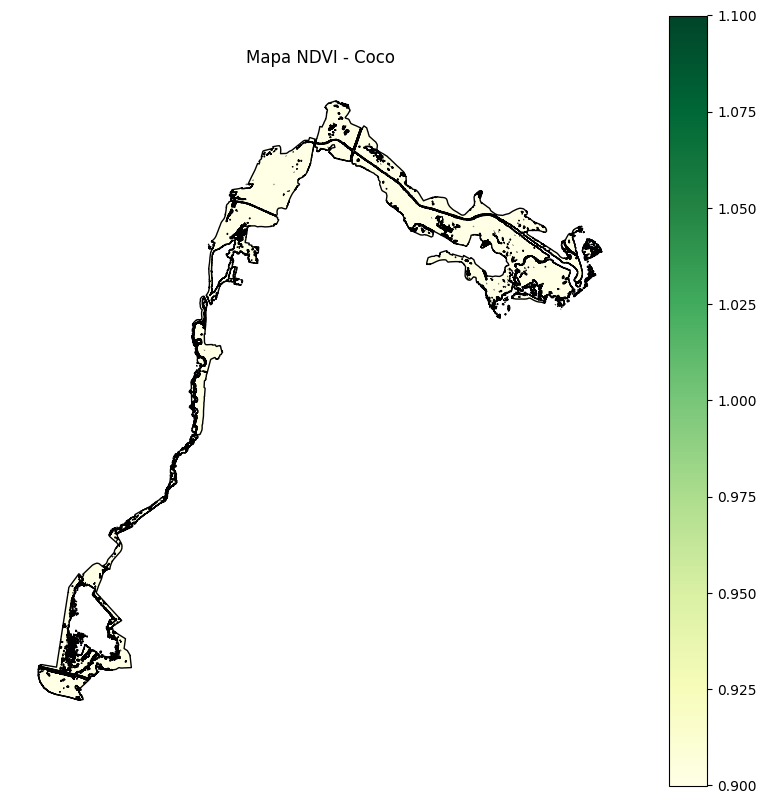

In [ ]:
gdf = gpd.read_file("ndvi_coco.geojson")

print(gdf.columns)
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(column='DN', ax=ax, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("Mapa NDVI - Coco")
ax.axis('off')
plt.show()

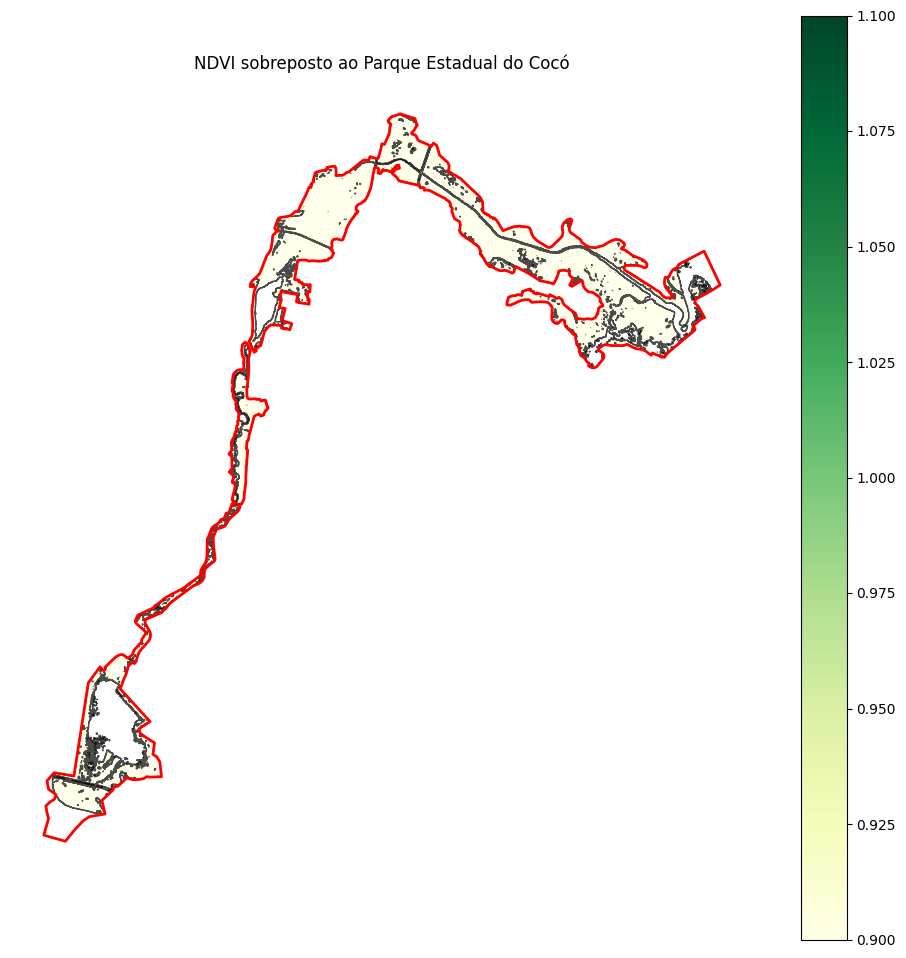

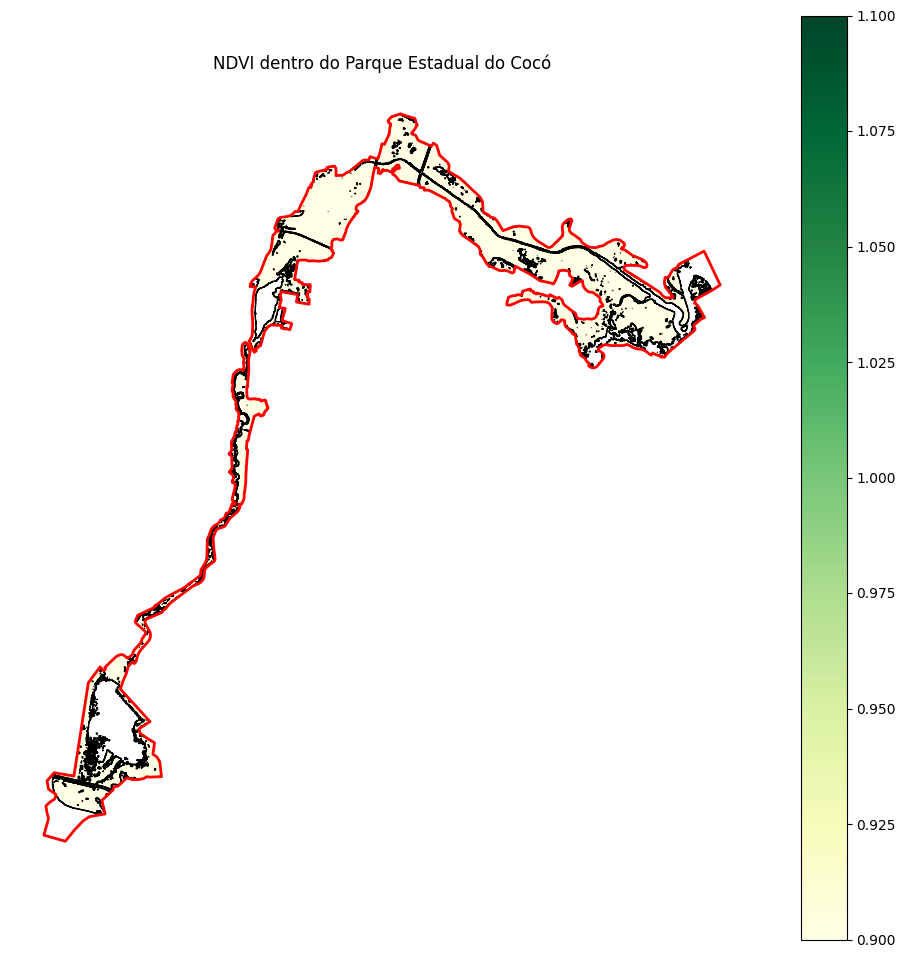

Estatísticas do NDVI dentro do Parque:
count    2.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: DN, dtype: float64


In [ ]:
ndvi_path = "ndvi_coco.geojson"
parque_path = "Parque_Estadual_do_Cocó.geojson"

gdf_ndvi = gpd.read_file(ndvi_path)
gdf_parque = gpd.read_file(parque_path)

if gdf_ndvi.crs != gdf_parque.crs:
    gdf_parque = gdf_parque.to_crs(gdf_ndvi.crs)

fig, ax = plt.subplots(figsize=(12, 12))

gdf_ndvi.plot(column='DN', cmap='YlGn', alpha=0.7, legend=True, ax=ax, edgecolor='k')
gdf_parque.boundary.plot(ax=ax, color='red', linewidth=2)
ax.set_title("NDVI sobreposto ao Parque Estadual do Cocó")
ax.axis('off')
plt.show()

if gdf_ndvi.crs != gdf_parque.crs:
    gdf_parque = gdf_parque.to_crs(gdf_ndvi.crs)
ndvi_no_parque = gpd.overlay(gdf_ndvi, gdf_parque, how='intersection')

fig, ax = plt.subplots(figsize=(12, 12))

ndvi_no_parque.plot(column='DN', cmap='YlGn', legend=True, ax=ax, edgecolor='k')
gdf_parque.boundary.plot(ax=ax, color='red', linewidth=2)
ax.set_title("NDVI dentro do Parque Estadual do Cocó")
ax.axis('off')
plt.show()

print("Estatísticas do NDVI dentro do Parque:")
print(ndvi_no_parque['DN'].describe())

In [ ]:
recursos_hidricos = gpd.read_file("Recursos_Hídricos.geojson")
ndvi_coco = gpd.read_file("ndvi_coco.geojson")
parque_coco = gpd.read_file("Parque_Estadual_do_Cocó.geojson")

crs_target = ndvi_coco.crs
recursos_hidricos = recursos_hidricos.to_crs(crs_target)
parque_coco = parque_coco.to_crs(crs_target)

area_recorte = gpd.overlay(ndvi_coco, parque_coco, how='union')

recursos_hidricos_recortados = gpd.overlay(recursos_hidricos, area_recorte, how='intersection')

recursos_hidricos_recortados.to_file("recursos_hidricos_recortados.geojson", driver='GeoJSON')

print("Corte realizado e salvo no arquivo 'recursos_hidricos_recortados.geojson'")


Corte realizado e salvo no arquivo 'recursos_hidricos_recortados.geojson'
